In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
df=pd.read_csv("D:\\tmdb-movies.csv")
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.   

       ...                                                overview runtime  \
0      ...       Twenty-two years after the events of Jurassic ...     124   
1      ...       An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  

[2 rows x 21 columns]

In [7]:
#list out all columns
df.columns.tolist()

#deleting columns which not required for analysis

delc=['id','imdb_id','homepage','tagline','keywords','overview','production_companies','vote_count','vote_average',
      'budget_adj','revenue_adj']

df1=df.drop(delc,axis=1)
df1.head()
df1.shape
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 636.7+ KB


In [8]:
#removing duplicates
df1.drop_duplicates(keep ='first',inplace=True)

#find null values
df1.isnull().sum()

#Converting budget,revenue columns to 0
col=['popularity','budget','revenue']
df1[col]=df1[col].replace(0,np.NAN)
df1.dropna(subset=col,inplace=True)
df1.shape

(3854, 10)

In [7]:
#converting relese_date
df1['release_date']=pd.to_datetime(df1['release_date'])
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null datetime64[ns]
release_year      3854 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 271.0+ KB


In [58]:
#chaning data_types to popularity,budge,revenue
d_t=['budget','revenue']
df1[d_t]=df1[d_t].apply(lambda x: x.astype(int))
# df1.info()
df1.head(2)


popularity     budget     revenue        Profit      original_title  \
0   32.985763  150000000  1513528810  1.363529e+09      Jurassic World   
1   28.419936  150000000   378436354  2.284364e+08  Mad Max: Fury Road   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

   runtime                                     genres release_date  \
0      124  Action|Adventure|Science Fiction|Thriller   2015-06-09   
1      120  Action|Adventure|Science Fiction|Thriller   2015-05-13   

   release_year  
0          2015  
1          2015

In [10]:
#Exploratory Analysis to find highest and lowest of earned revenue
hir=df1['revenue'].idxmax()
hir_d=pd.DataFrame(df1.loc[hir])
hir_d


lor=df1['revenue'].idxmin()
lor_d=pd.DataFrame(df1.loc[lor])
lor_d

revenue_Max_Min=pd.concat([hir_d,lor_d],axis=1)
revenue_Max_Min

#find highest and lowest of budget

bdh=df1['budget'].idxmax()
bdh_d=pd.DataFrame(df1.loc[bdh])
bdh_d

bdl=df1['budget'].idxmin()
bdl_d=pd.DataFrame(df1.loc[bdl])
bdl_d

budget_Max_Min=pd.concat([bdh_d,bdl_d],axis=1)
budget_Max_Min

##Calculate profit for each movies 
pf=df1.revenue-df.budget
df1.insert(3,"Profit",pf)


#Highest profit for last 3 years(eg:2013,2014,2015)
#We can provide any year to determine profit
year=2013
rel_y= df1[df1['release_year']==year]
rel_y1=rel_y.Profit.idxmax()
rel_y2=pd.DataFrame(df1.loc[rel_y1])
rel_y2

#Yearwise profit
pfit=df1.groupby('release_year') ['Profit'].sum()


#Count of movies released by year

ct=df1.groupby('release_year')['original_title'].count()
ct

#Average runtime of all the movies by year
avg=df1.groupby('release_year')['runtime'].mean()
avg
#def function method
def avg_f(column):
    return df1[column].mean()

avg_f('runtime')
avg_f('budget')
#generating runtime description
df1['runtime'].describe()
#Graphical reprasentation for runtime movies
plt.hist(df['runtime'],bins=43,color='orange')
plt.xlabel('runtime')
plt.ylabel('Number of Moveis')
plt.title('Runtime for all Movies')
#Observation:-The distribution of the above formed graph is positively skewed or right skewed!

37203696.954852104

In [45]:
#Exploratory Analysis on genres column
gen=df1['genres'].str.cat(sep="|")
gen=pd.Series(gen.split('|'))
gen=gen.value_counts()
gen2=gen.sort_values(ascending=True)

#Top 5 genres
# gen.head()
#Graphical reprasentation for genres
#Vertical Bar graph
# gen.plot.bar(color = 'Blue',fontsize = 13)
# plt.xlabel('Number of Movies')
# plt.title('Genres count over Movies')

#Horizontal Bar graph
# gen2.plot.barh(color = 'Blue',fontsize = 13)
# plt.xlabel('Number of Movies')
# plt.title('Genres count over Movies')
#Observation: Drama is most categorical moveis which audiance prefer 

['Nicolas Cage', 'Samuel L. Jackson', 'Robert De Niro', 'Bruce Willis', 'Matt Damon']


<function matplotlib.pyplot.show>

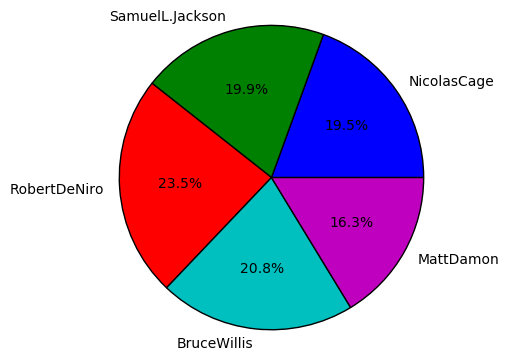

In [211]:
#Top 5 famous actors
actor=df1['cast'].str.cat(sep="|")
actor=pd.Series(actor.split("|"))
actor=actor.value_counts()
#Top 5 Leading actor
cnt=actor.head()
#converting to dictionary
cnt1=dict(cnt)
cnt1
sze=list(cnt1.keys())
print(sze,end='\n')
sze1=list(cnt1.values())
sze1

label=[i.replace(" ","") for i in sze]
label
plt.pie(sze1,labels=label,autopct='%1.1f%%')
plt.axis('equal')
plt.legend()
plt.show

#Observation: Robert De Niro is leading actor with 52 movies total followed by Bruce Willis fo total 46.

In [18]:
#Scatter plot for Release year vs Popularity 

sp=df1.loc[:,['popularity','release_year']]
sq=sp.astype(int)
sq1=sq.groupby('release_year')['popularity'].sum()
sq2=pd.DataFrame(sq1)
sq2.reset_index(level=0, inplace=True)
x=list(sq2['popularity'])
y=list(sq2['release_year'])
# x=list(sq['popularity'])
# y=list(sq['release_year'])
plt.scatter(y,x,alpha=0.3,marker='o')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Release Year vs Popularity')
plt.show()

#Observation: Most popular movies were released in 2015,2014 compared to 1960's due to new technologies and genres(Drama,Comedy and Thiller) is involved